# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [2]:
df_mall = pd.read_csv("./data/Mall_Customers.csv")
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
missing = df_mall.isna().sum()
missing[missing>0]

Series([], dtype: int64)

In [4]:
df_mall.shape

(200, 5)

In [5]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Preprocessing

In [6]:
# Drop Irrelevant columns

df_mall.drop("CustomerID", axis=1, inplace=True)

In [7]:
df_mall.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [8]:
df_mall.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
# Convert Categorical column into numeric column
df_mall["Gender"] = df_mall["Gender"].map({'Male':0, 'Female':1})

In [10]:
df_mall.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81


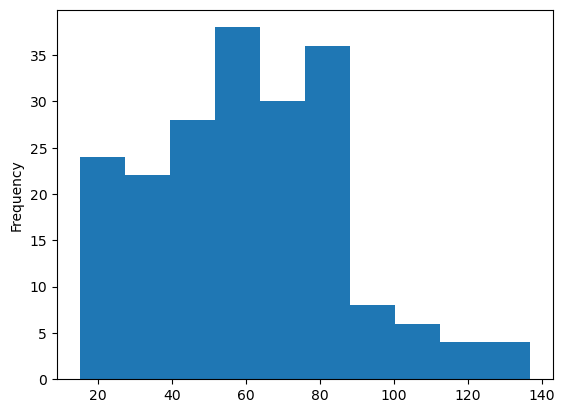

In [11]:
df_mall["Annual Income (k$)"].plot(kind="hist", bins=10)
plt.show();

In [12]:
max(df_mall["Annual Income (k$)"])

137

In [13]:
min(df_mall["Annual Income (k$)"])

15

In [14]:
max(df_mall["Age"])

70

In [15]:
min(df_mall["Age"])

18

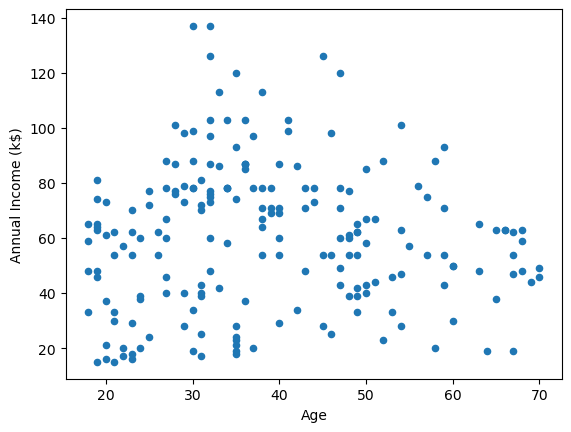

In [16]:
df_mall.plot(x="Age", y="Annual Income (k$)", kind="scatter")
plt.show();

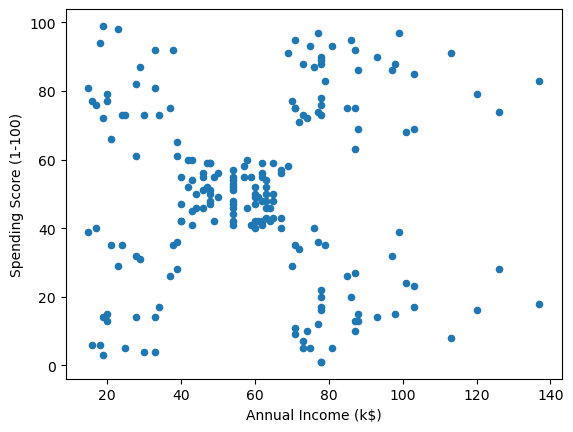

In [17]:
df_mall.plot(x="Annual Income (k$)", y="Spending Score (1-100)", kind="scatter")
plt.show()

In [18]:
# Standardization

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_mall)
df_mall_scaled = pd.DataFrame(scaled_features, columns=df_mall.columns)

# Find the optimal number of Clusters

#### By using Elbow Method

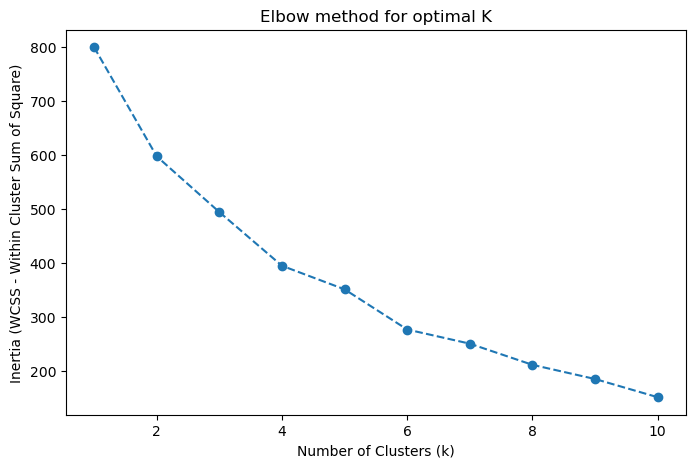

In [19]:
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mall_scaled)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS - Within Cluster Sum of Square)")
plt.title("Elbow method for optimal K")
plt.show()

#### Silhouette Score

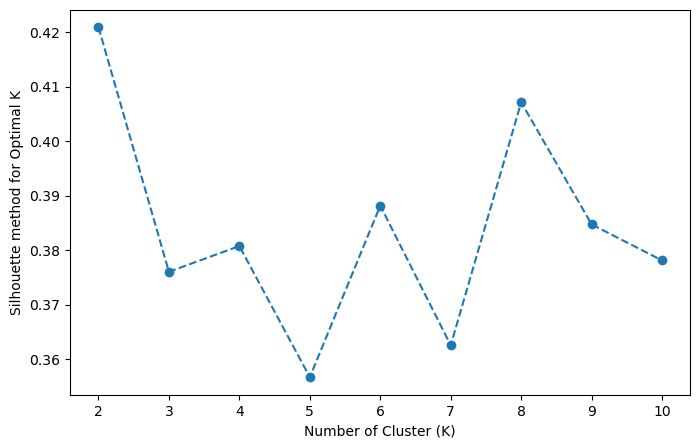

In [32]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhoutte_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_mall_scaled)
    score = silhouette_score(df_mall_scaled, cluster_labels)
    silhoutte_scores.append(score)


plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhoutte_scores, marker='o', linestyle='--')
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Silhouette method for Optimal K")
plt.show()

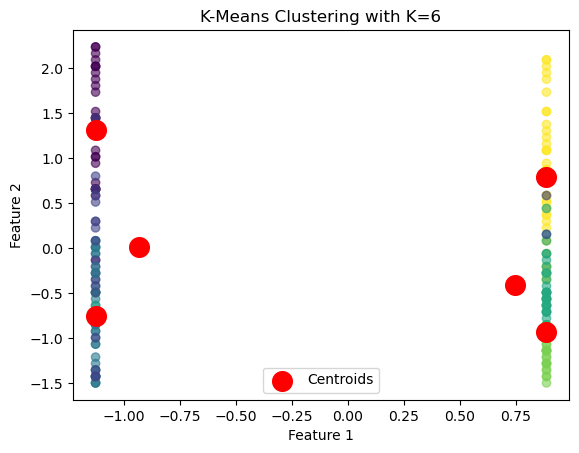

In [28]:
# Fit the Final K-Means Model

best_k = 6

kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_mall_scaled)

# Add cluster labels to the dataset

df_mall_scaled["Cluster"] = cluster_labels

# Visualize clusters (if 2D)
plt.scatter(df_mall_scaled.iloc[:,0], df_mall_scaled.iloc[:,1], c=cluster_labels, cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering with K=6")
plt.legend()
plt.show()

In [29]:
df_mall_scaled.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,-7.549517e-17,-1.021405e-16,-2.131628e-16,-1.465494e-16,2.825000
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.726057
min,-1.128152e+00,-1.496335e+00,-1.738999e+00,-1.910021e+00,0.000000
25%,-1.128152e+00,-7.248436e-01,-7.275093e-01,-5.997931e-01,2.000000
50%,8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03,3.000000
75%,8.864053e-01,7.284319e-01,6.656748e-01,8.851316e-01,4.000000
max,8.864053e-01,2.235532e+00,2.917671e+00,1.894492e+00,5.000000


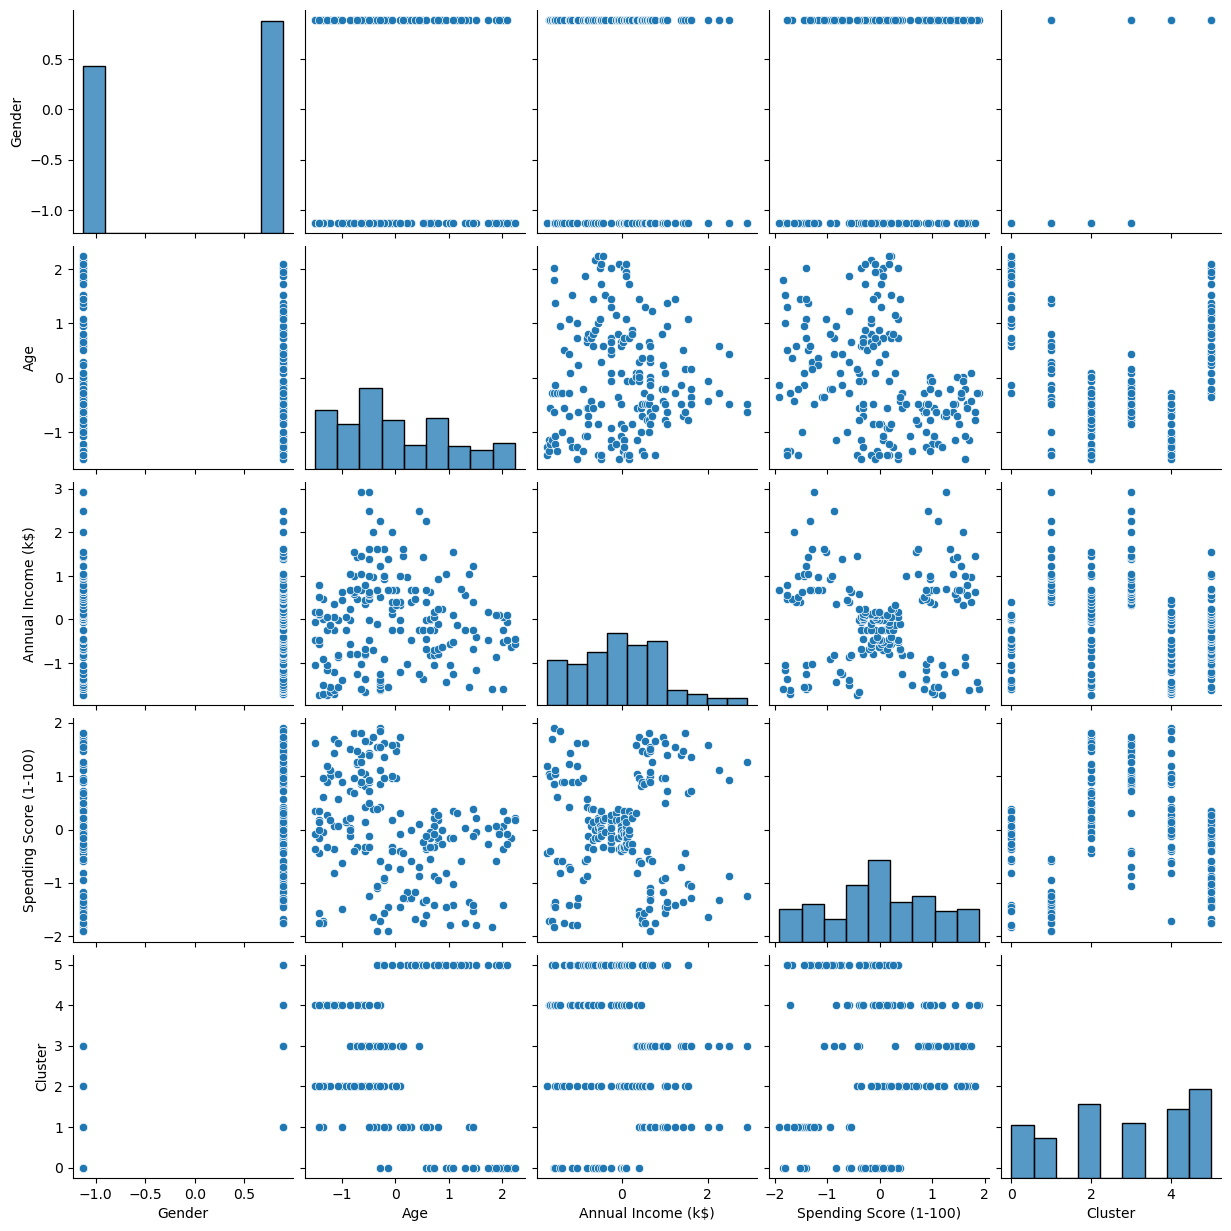

In [30]:
sns.pairplot(df_mall_scaled)

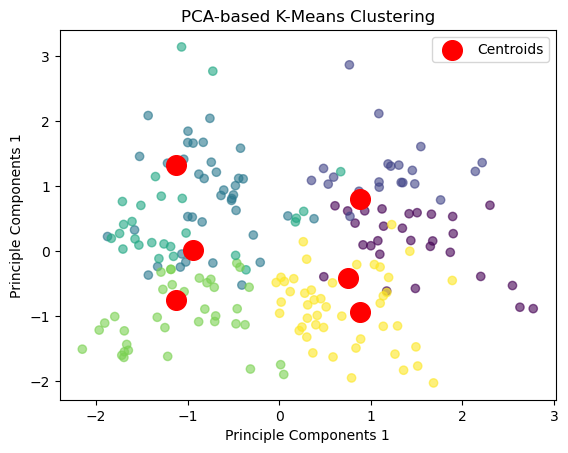

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_mall_scaled.drop("Cluster", axis=1))
plt.scatter(reduced_data[:,0], reduced_data[:,1],
           c=cluster_labels, cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", label="Centroids")

plt.xlabel("Principle Components 1")
plt.ylabel("Principle Components 1")
plt.title("PCA-based K-Means Clustering")
plt.legend()
plt.show()

In [43]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(df_mall_scaled)


silhouette_avg = silhouette_score(df_mall_scaled, labels)
print(f"silhouette score: {silhouette_avg:.4f}")

db_index = davies_bouldin_score(df_mall_scaled, labels)
print(f"Davies Bouldin Score: {db_index:.4f}")

silhouette score: 0.3882
Davies Bouldin Score: 1.1198
